In [211]:
#import CSV
import pandas as pd 
data = pd.read_csv("test.csv", dtype={'Source':'str','Destination':'str','Info':'str'}) 
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,244.3.90.4,41.177.98.92,SSH,134,Client: Encrypted packet (len=64)
1,2,0.000075,41.177.98.92,244.3.90.4,SSH,1438,Server: Encrypted packet (len=1368)
2,3,0.000105,41.177.98.92,244.3.90.4,SSH,1438,Server: Encrypted packet (len=1368)
3,4,0.000144,244.3.90.4,41.177.98.92,TCP,70,59984 > 22 [ACK] Seq=65 Ack=2737 Win=65535 L...
4,5,0.000324,41.177.98.92,244.3.90.4,SSH,1438,Server: Encrypted packet (len=1368)


In [212]:
# from scapy.layers.inet import *
# import time

# start = time.time()
# #filename='sm.pcap'
# filename='full.pcap'
# print("Begun to read packets")
# reader = PcapReader(filename)
# print("Finished reading packets")

In [213]:
df = pd.DataFrame(data)
df.dtypes

No.              int64
Time           float64
Source          object
Destination     object
Protocol        object
Length           int64
Info            object
dtype: object

In [214]:
source = '41.177.26.176'
destination = '77.197.210.77'

In [215]:
#df[df['Source']==('244.3.90.4'|'41.177.98.92')]

In [216]:
df_sender = df[(df['Source'] == source) & (df['Destination'] == destination)]
df_sender.head()

,No.,Time,Source,Destination,Protocol,Length,Info
4939,4940,0.312573,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=1 Ack=1 Win=64240 Len=1460
4940,4941,0.312578,41.177.26.176,77.197.210.77,TCP,1028,"80 > 53705 [PSH, ACK] Seq=1461 Ack=1 Win=642..."
4942,4943,0.312724,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=2431 Ack=1 Win=64240 Le...
4943,4944,0.312728,41.177.26.176,77.197.210.77,TCP,64,"80 > 53705 [PSH, ACK] Seq=3891 Ack=1 Win=642..."
6205,6206,0.391994,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=3896 Ack=1 Win=64240 Le...


In [217]:
df_receiver = df[(df['Source'] == destination) & (df['Destination'] == source)]
df_receiver.head()

,No.,Time,Source,Destination,Protocol,Length,Info
6193,6194,0.391446,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=2431 Win=65535 Len=0
6194,6195,0.391450,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=3896 Win=65535 Len=0
7372,7373,0.470827,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=6070 Win=65535 Len=0
7373,7374,0.470832,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=7790 Win=65535 Len=0
7377,7378,0.470950,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=10391 Win=65535 L...


In [218]:
df_concat = pd.concat([df_sender,df_receiver])
df_sort = df_concat.sort_values(by=['Time'])

In [219]:
#[df['Destination']==('41.177.98.92')]

In [220]:
# df['Source'].apply(pd.to_string, downcast='float', errors='coerce')

In [221]:
#df['Info'].map(lambda x:  type(x))

In [222]:
df_sort

,No.,Time,Source,Destination,Protocol,Length,Info
4939,4940,0.312573,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=1 Ack=1 Win=64240 Len=1460
4940,4941,0.312578,41.177.26.176,77.197.210.77,TCP,1028,"80 > 53705 [PSH, ACK] Seq=1461 Ack=1 Win=642..."
4942,4943,0.312724,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=2431 Ack=1 Win=64240 Le...
4943,4944,0.312728,41.177.26.176,77.197.210.77,TCP,64,"80 > 53705 [PSH, ACK] Seq=3891 Ack=1 Win=642..."
6193,6194,0.391446,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=2431 Win=65535 Len=0
6194,6195,0.391450,77.197.210.77,41.177.26.176,TCP,64,53705 > 80 [ACK] Seq=1 Ack=3896 Win=65535 Len=0
6205,6206,0.391994,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=3896 Ack=1 Win=64240 Le...
6206,6207,0.391999,41.177.26.176,77.197.210.77,TCP,772,80 > 53705 [ACK] Seq=5356 Ack=1 Win=64240 Le...
6209,6210,0.392011,41.177.26.176,77.197.210.77,TCP,1518,80 > 53705 [ACK] Seq=6070 Ack=1 Win=64240 Le...
6210,6211,0.392014,41.177.26.176,77.197.210.77,TCP,318,80 > 53705 [ACK] Seq=7530 Ack=1 Win=64240 Le...


In [223]:
# ACKinit = 0
# srtt = []
# for i in range(len(df_sort['Info'])):
#     if("ACK" in df_sort['Info']):
#         RTT=df_sort['Time'] - ACKinit
#         srtt.append(RTT)
#         ACKinit=RTT

# # for index, row in df_sort.iterrows():
# print(srtt)

In [224]:
ACKinit=0
srtt=[]
for i, row in df_sort.iterrows():
    if ('ACK' in row['Info']):
        ACKinit=row['Time']
        srtt.append(ACKinit)
        #     if ("ACK" in df_sort['Info']):
    

In [225]:
srtt[1]

0.312578

In [226]:
ertt=[]
alpha=1/8
prtt=0
for i in range(len(srtt)):
     prtt = (1 - alpha) * srtt[i] + alpha * (srtt[i]/2)
     ertt.append(prtt)

In [227]:
ertt[1]

0.293041875

In [228]:
import matplotlib.pyplot as plt
import numpy as np

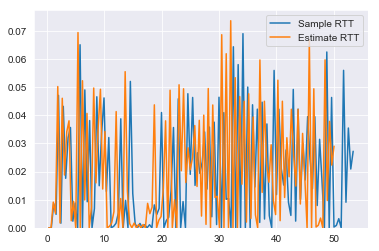

In [229]:
import seaborn as sns

sns.set_style('darkgrid')
sns.kdeplot(srtt, bw=0, label="Sample RTT")
sns.kdeplot(ertt, bw=0, label="Estimate RTT")
plt.legend();

In [230]:
import math as math
mrtt = []
median = 0
index = 0
for i in range(len(ertt)):
    if i == 0:
        median = ertt[0]
        mrtt.append(median)
    elif i == 1:
        median = (ertt[0] + ertt[1])/2
        mrtt.append(median)
        
    elif (i+1)%2 != 0:
            index = i/2
            median = ertt[int(i/2)]
            mrtt.append(median)
    else:
        median = (ertt[int((i-1)/2)] + ertt[int((i+1)/2)]) / 2
        mrtt.append(median)
        
            

In [231]:
# mrtt

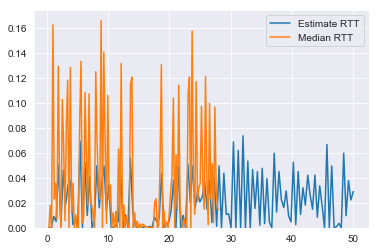

In [232]:
import seaborn as sns

sns.set_style('darkgrid')
sns.kdeplot(ertt, bw=0, label="Estimate RTT")
sns.kdeplot(mrtt, bw=0, label="Median RTT")
plt.legend();